In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
data = pd.read_csv('Iris.csv')

In [56]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [57]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [58]:
data.isna()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
145,False,False,False,False,False,False
146,False,False,False,False,False,False
147,False,False,False,False,False,False
148,False,False,False,False,False,False


In [59]:
data.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [60]:
data.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [61]:
data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [62]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [63]:
data.rename(columns={'SepalWidthCm': 'Sepal_Width_Cm', 'SepalLengthCm':'Sepal_Length_Cm', 'PetalWidthCm':'Petal_Width_Cm', 'PetalLengthCm':'Petal_Length_Cm'}, inplace=True)

In [64]:
data.columns

Index(['Id', 'Sepal_Length_Cm', 'Sepal_Width_Cm', 'Petal_Length_Cm',
       'Petal_Width_Cm', 'Species'],
      dtype='object')

In [65]:
data.drop('Id', axis=1, inplace=True)

/Users/ghanshyam/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


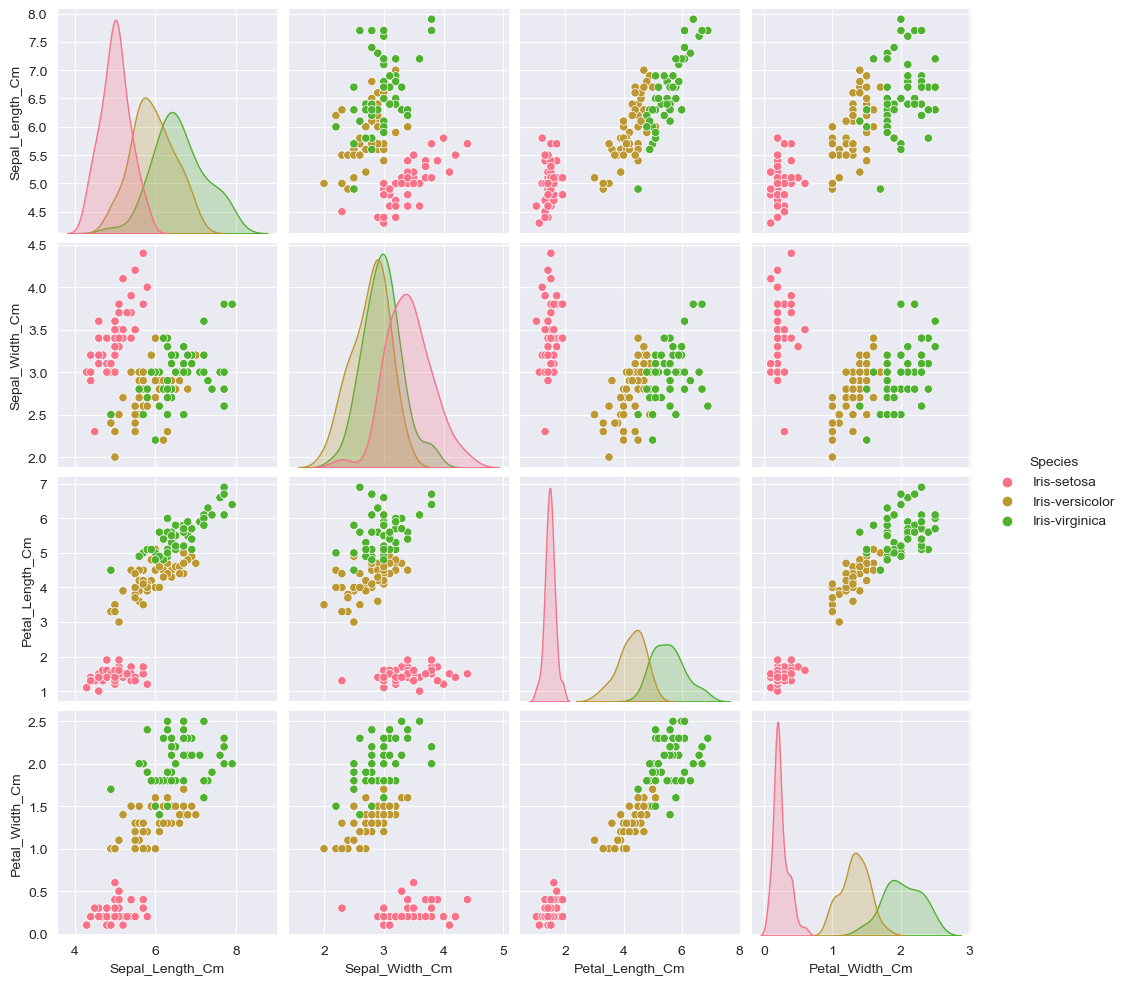

In [66]:
sns.pairplot(data, hue='Species')
plt.show()

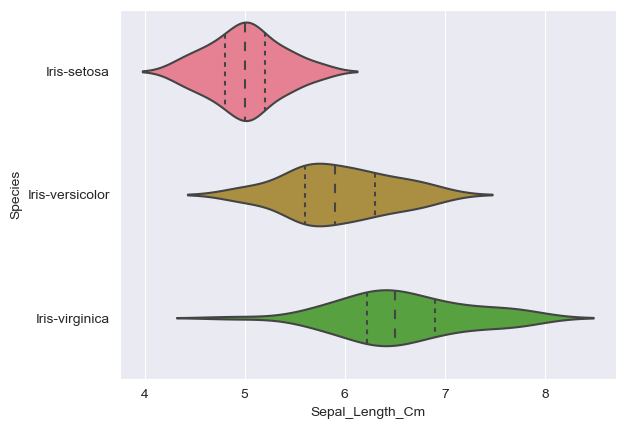

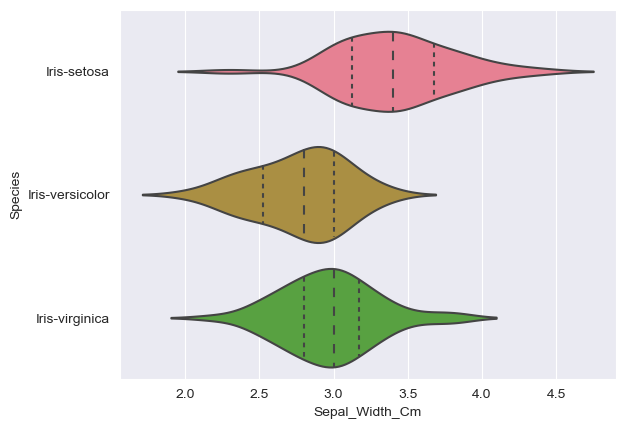

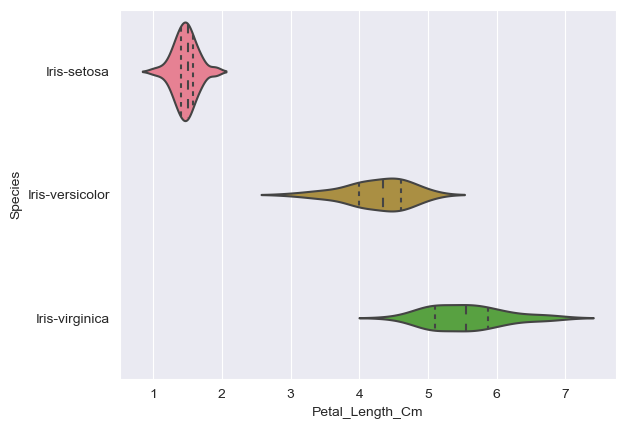

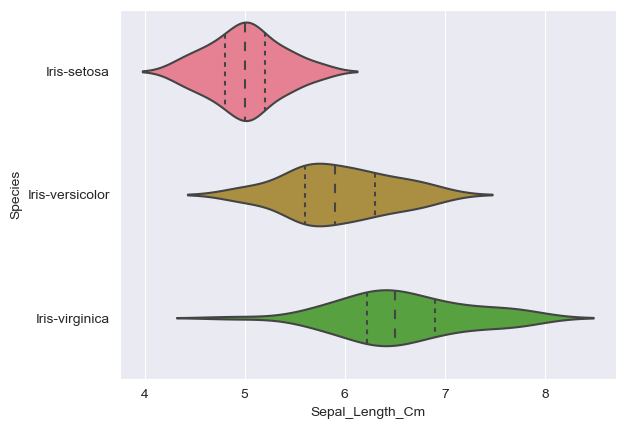

In [67]:
sns.violinplot(y='Species', x='Sepal_Length_Cm', data=data, inner='quartile')
plt.show()
sns.violinplot(y='Species', x='Sepal_Width_Cm', data=data, inner='quartile')
plt.show()
sns.violinplot(y='Species', x='Petal_Length_Cm', data=data, inner='quartile')
plt.show()
sns.violinplot(y='Species', x='Sepal_Length_Cm', data=data, inner='quartile')
plt.show()

In [68]:
#modeling with scikit learn

In [69]:
X = data.drop('Species', axis=1)
y = data['Species']
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [70]:
#training And testing on the same dataset

###Advantagese
#by splitting the dataset pseduo randomly into a two seprate sets, we can train using one set and test using another
#this ensutes that we won't use the same observations in both sets.
#mote flexibl3e and faster than creating a model using all of the dataset for trainning.

In [71]:
### Disadvantages
#the accuracy scores for the testing set can vary depending on what observation are in the set.
#this disadvantages can be countered using k-fold cross-validation.


In [72]:
### NOTE
# the accuracy score of the models depends on the observations in the testing set, which is determined by the seed of the pseudo random numbers generatores
#as a model's complexity increase, the training accuracy increase
#if a model is too complex or not cxomplex enough the testing accuracy is lower
#for KNN models the value of k tetermines the level of complexity a lower value of k means that model is more complex.


In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=5)
print(X_test.shape)
print(y_test.shape)
print(X_train.shape)
print(y_train.shape)

(60, 4)
(60,)
(90, 4)
(90,)


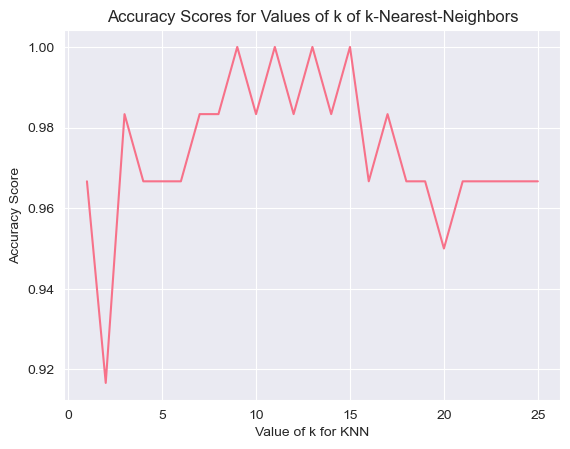

In [75]:
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [76]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9833333333333333


In [77]:
### choosing KNN to Model iris species prediction with k = 12
# after setting the value of just the training set.

In [78]:
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X, y)
knn.predict([[6, 3, 4, 2]])

/Users/ghanshyam/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Iris-versicolor'], dtype=object)

In [4]:
def addition(add_number,sub):
    output_result = add_number + sub
    return output_result

In [5]:
addition_1= addition(10, 20)
print(addition_1)

30


In [8]:
def get_pay(num_hours):
    pay_pretax = num_hours*15
    pay_after_tax = pay_pretax - pay_pretax*0.12
    return pay_after_tax

In [10]:
fulltime_pay = get_pay(40)
print(fulltime_pay)

528.0


In [11]:
def with_more_inputes(num_hours, tax_rate, hourly_rate):
    pay_before_tax= num_hours * hourly_rate
    pay_after_tax = pay_before_tax - pay_before_tax*(tax_rate/100)
    return pay_after_tax

In [13]:
print(with_more_inputes(40, 12, 15))

528.0
